In [2]:
#want to see number of friends people have on average

import collections
import matplotlib.pyplot as plt

num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

friend_counts = collections.Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel('# of people')
plt.show()

In [3]:
#still quite difficult to talk about over a conversation
#need to generate some statistics

num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)
sorted_values = sorted(num_friends)

In [4]:
#want notion of where our data is centered using mean

def mean(x):
    return sum(x) / len(x)

print(mean(num_friends))

7.333333333333333


In [6]:
#the median is the middle-most value (for odd number of points) or average
#of the two middle values (for even number of points)
#unlike mean, doesn't depend on every data point in the data, i.e if the largest
#value gets larger or smallest gets smaller, then doesn't change the median

def median(v):
    """finds middle-most value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n%2 == 1:
        #if odd, return middle value
        return sorted_v[midpoint]
    
    else:
        #if even return average of middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

print(median(num_friends))

6.0


In [19]:
#mean is good as it is easier to compute and varies smoothly as data changes
#if one data point changes by e, then the mean changes by e/n
#however the median relies sorting data, and changing a point by e might not
#even change the median at all

#however the mean is sensitive to outliers in our data
#i.e. if a new person was added to the data with 200 friends then the mean increases

#a generalization of the median is the `quantile`, represents values less than
#which a certain percentile of the data lies
#the median represents the value less than which 50% of the data lies

def quantile(x, p):
    """returns the p-th-percentile value in x"""
    p_index = int(p*len(x))
    return sorted(x)[p_index]

print(quantile(num_friends, 0.5))
print(quantile(num_friends, 0.1))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.9))

6
1
3
9
13


In [34]:
#mode is the most common value
def mode(x):
    """returns a list as might be more than one mode"""
    counts = collections.Counter(x) #counts is a dict of value: n_appearances
    max_count = max(counts.values())
    return [x_i for (x_i, count) in counts.items() if count == max_count]

print(mode(num_friends))

[6, 1]


In [28]:
#dispersion is how spread out the data is
#values near 0 mean not spread out at all
#large values mean very spread out

#simplest is the range, different between largest and smallest points
def data_range(x):
    return max(x) - min(x)

print(data_range(num_friends))

99


In [30]:
#a more complex measure of dispersion is the variance

def de_mean(x):
    """translate x by subtracting its own mean (so result has mean of 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

## USING THESE TWO FUNCTIONS FROM LAST CHAPTER
def dot(v, w):
    """v_0 * w_0 + ... + v_n * w_n """
    return sum(v_i * w_i for (v_i, w_i) in zip(v, w))

def sum_of_squares(v):
    """ v0 * v0 + ... + v_n + v_n"""
    return dot(v, v)
## USING THESE TWO FUNCTIONS FROM LAST CHAPTER

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

print(variance(num_friends))

#this looks like it is the average squared deviation from the mean
#except we are dividing n-1 instead of n

#in fact, when dealing with a sample from a larger population, x_bar is only
#an estimate of the actual mean, which means on average (x_i - x_bar) ** 2 is
#an uderestimate of x_i's squared deviation from the mean, which is why
#we divide by n-1 instead

81.54351395730716


In [32]:
#whatever our units of data, all of the measures of central tendency are
#in the same unit
#however the variance has units that are the square of the original units
#i.e. "friends squared", this can be hard to make sense of, so we usually look at
#the standard deviation

import math

def standard_deviation(x):
    return math.sqrt(variance(x))

print(standard_deviation(num_friends))

9.03014473623248


In [33]:
#standard deviation and the range have the same problem as the mean, if we
#add a new user with 200 friends as an outlier it massively increases the value

#more robust is to compute the difference between the 75th and 25th percentile value

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

print(interquartile_range(num_friends))

6


In [36]:
#want to check if number of minutes spent on the sit is related to number of friends
#first look at covariance, the analogue of variance
#variance measures how a single variable deviates from its mena
#covariance measures how two variables vary in tandem from their means

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

print(covariance(num_friends, daily_minutes))

#dot product sums the products of corresponding pairs of elements
#when both x and y are both above their means or both are below their means
#a positive number enters the sum
#when one is below and one is above, a negative value enters the sum

#large positive covariance means x tends to be large when y is large (that is, 
#larger than the mean), and small when y is small (again, smaller than the mean)

#large negative covariance means the opposite, x is small when y is large, vice versa

#covariance close to zero means no relationships exist

22.425435139573064


In [38]:
#covariance is hard to interpret as:
# - units are the product of input units, here it's friend minutes per day, which
#   doesn't really make sense
# - if each user has twice as many friends (but same number of minutes) the
#   covariance would be twice as large, but the variables would be just as related

#it's more common to look at the correlation which divides our the standard
#deviations of both variances

def correlation(x, y):
    std_x = standard_deviation(x)
    std_y = standard_deviation(y) #sqrt of sum of squares of deviations div by n-1
    if std_x > 0 and std_y > 0:
        return covariance(x, y) / std_x / std_y
    else:
        return 0 #if not variation, correlation is 0
    
print(correlation(num_friends, daily_minutes))

#correlation always lies between -1 (perfect anti-correlation) and 1 (perfect 
#correlation)
#0.25 represents a weak positive correlation

0.24736957366478218


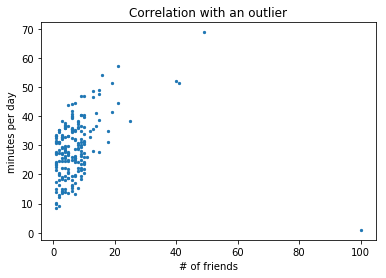

In [53]:
#we did all this without even looking at the data

import matplotlib.pyplot as plt

plt.scatter(num_friends, daily_minutes, s=5) #x, y, size of points
plt.title('Correlation with an outlier')
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.show()

In [57]:
#the person with 100 friends and only 1 minute per day on the site (bottom right)
#is a huge outlier, and correlation is very sensitive to outliers

outlier = num_friends.index(100)

num_friends_good = [x for (i,x) in enumerate(num_friends) if i != outlier]

daily_minutes_good = [x for (i,x) in enumerate(daily_minutes) if i != outlier]

print(correlation(num_friends_good, daily_minutes_good)) #more than doubled!

0.5736792115665573


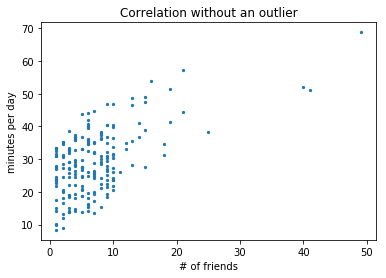

In [58]:
plt.scatter(num_friends_good, daily_minutes_good, s=5) #x, y, size of points
plt.title('Correlation without an outlier')
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.show()

In [59]:
#simpson's paradox is when correlations can be misleading when 'confounding' variables
#are ignored

#identify all members as either east or west coast
#you find the on average west coast people have more friends

#however looking at the data in more detail you find that if you only look
#at people WITH PhDs then east coast people have more friends on average, however
#generally have a lot less friends than normal
#and if you look at people WITHOUT PhDs, still have more friends on average
#there are a lot more PhD people on the east coast

#once you account for degrees, correlation goes in the opposite direction
#bucketing data into coasts disguised the fact that east coast data scientists
#skew more heavily toward phd types (those who on average have a lot less friends)

#the key issue is correlation is measures the relationship between two variables
#when all else is equal!

#the only way to avoid this is by KNOWING YOUR DATA and checking for confounding 
#factors
#if you didn't know the degrees of those people, you wouldn't be able to find this

In [62]:
#a correlation of zero indicates there is no linear relationship between two
#variables, however there may be other types of relationships

#these two have zero correlation, but certainly have a relationship
#each y is abs(x)

#they just don't have a relationship comparing how x_i compares to mean(x) and y_i
#compares to mean(y), which is the relationship correlation looks for

x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]

print(correlation(x, y))

0.0


In [63]:
#correlation also doesn't tell you how how large the relationship is

#these two have a relatively high correlation, but it's possible the relationship
#isn't that interesting

x = [-2, 1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

print(correlation(x, y))

0.8340576562281805


In [64]:
#"correlation is not causation", if x and y are strongly correlated, it might
#mean that x causes y or y causes x, that each causes the other, some third
#factor causes both or it might mean nothing at all

#consider number of friends to minutes on the site. it's possible having more friends
#causes people to spend more time on the time as each friend posts some content
#each day which means having more friends makes you take longer to read everyone's
#content

#however it's possible the more time you spend on the site talking to random people
#on the chatrooms causes you to meet like-minded people and make more friends

#or users who love data science spend more time on the site (as they find it interesting)
#and more actively collect data science friends (as they don't talk to others)

#one way to test causality is by conducting randomized trials
#randomly split users into two groups with similar demographics
#if you give one group a different experience then you can be sure that
#different experiences are causing different outcomes

#i.e split users into two groups and show one group content only from a fraction
#of their friends, if this group spends less time on the site this means that
#you would be confidence that having more friends causes more time on the site

In [ ]:
#for more on stats
# free book https://www.openintro.org/stat/textbook.php?stat_book=os
# free book https://openstax.org/details/introductory-statistics